In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

Load the CIFAR-10 dataset

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape


(50000, 32, 32, 3)

In [33]:
x_test.shape

(10000, 32, 32, 3)

In [34]:
y_train.shape

(50000, 1)

In [35]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [36]:
y_train = y_train.reshape(-1,)
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

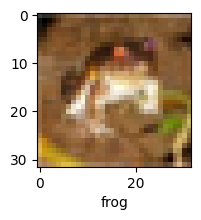

In [37]:
plot_sample(x_train, y_train, 0)

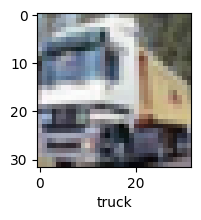

In [38]:
plot_sample(x_train, y_train, 1)

Data Augmentation and Normalization

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

Validation data should not be augmented, only rescaled

In [40]:

test_datagen = ImageDataGenerator(rescale=1./255)


Create generators

In [41]:
# Create generators
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

Build the model

In [42]:
model = models.Sequential()
model = models.Sequential()
model.add(layers.Conv2D(32,                  # Number of filters/Kernels
                     (3,3),               # Size of kernels (3x3 matrix)
                     strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                     padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input.
                    input_shape = (32,32,3), # Input image shape
                    activation='relu'
                    ))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5,5), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3,3), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(256, (5,5), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(512, (3,3), padding = 'same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(layers.Dropout(0.3))

# Flattening tensors
model.add(layers.Flatten())

# Fully-Connected Layers
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(10, activation = 'softmax')) # Classification layer


In [43]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_16 (Ba  (None, 16, 16, 64)       

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the model with augmented data

In [45]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[reduce_lr, early_stopping,checkpoint]
)

Epoch 1/50
1563/1563 [==============================] - 40s 24ms/step - loss: 1.6748 - accuracy: 0.4082 - val_loss: 1.4757 - val_accuracy: 0.4983 - lr: 0.0010
Epoch 2/50
   1/1563 [..............................] - ETA: 56s - loss: 1.4574 - accuracy: 0.4688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 37s 24ms/step - loss: 1.3206 - accuracy: 0.5400 - val_loss: 1.3611 - val_accuracy: 0.5374 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1673 - accuracy: 0.5977 - val_loss: 1.1403 - val_accuracy: 0.6284 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0862 - accuracy: 0.6266 - val_loss: 1.0237 - val_accuracy: 0.6493 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0129 - accuracy: 0.6572 - val_loss: 0.9318 - val_accuracy: 0.6857 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9602 - accuracy: 0.6748 - val_loss: 0.8418 - val_accuracy: 0.7108 - lr: 0.0010
Epoch 7/50
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9131 - accuracy: 0.6918 - val_loss: 0.7809 - val_accuracy: 0.7325 - lr: 0.0010
Epoch 8/50
1563/1563 [==============================] - 3

Evaluate the model

In [46]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.5339 - accuracy: 0.8179 - 1s/epoch - 4ms/step

Test accuracy: 0.8179000020027161


Plot training & validation accuracy and loss values

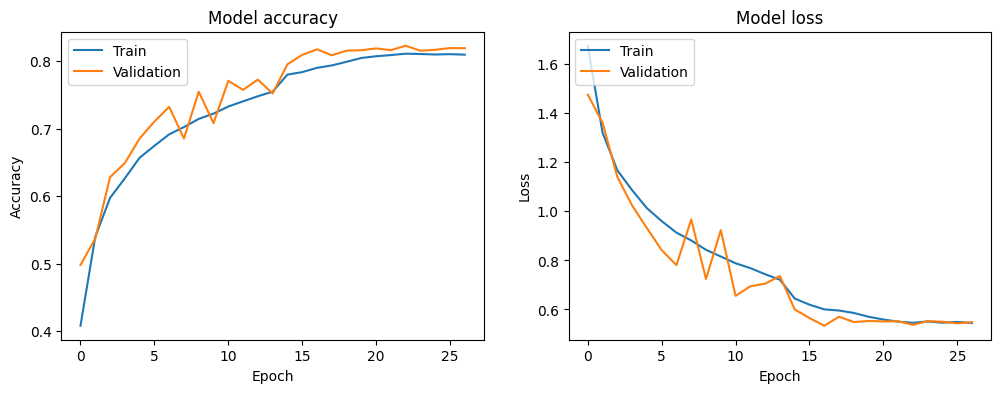

In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Load an image and predict its class

In [48]:
img_path = 'deer.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values to [0, 1]


Make prediction

In [49]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted class: {predicted_class[0]}')

1/1 [==============================] - 0s 123ms/step
Predicted class: 4


Map the predicted class index to the class label

In [50]:
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted label: {predicted_label}')


Predicted label: deer


Confusion Matrix and Classification Report Predict the values from the validation dataset

In [51]:
y_pred = model.predict(x_test / 255.)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


Compute the confusion matrix

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

Compute the classification report

In [53]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred_classes, target_names=class_labels)

In [54]:
print("\nClassification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

    airplane       0.82      0.86      0.84      1000
  automobile       0.90      0.94      0.92      1000
        bird       0.84      0.68      0.75      1000
         cat       0.71      0.59      0.65      1000
        deer       0.78      0.82      0.80      1000
         dog       0.75      0.70      0.72      1000
        frog       0.76      0.92      0.83      1000
       horse       0.84      0.88      0.86      1000
        ship       0.91      0.90      0.90      1000
       truck       0.87      0.89      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



Plot the confusion matrix

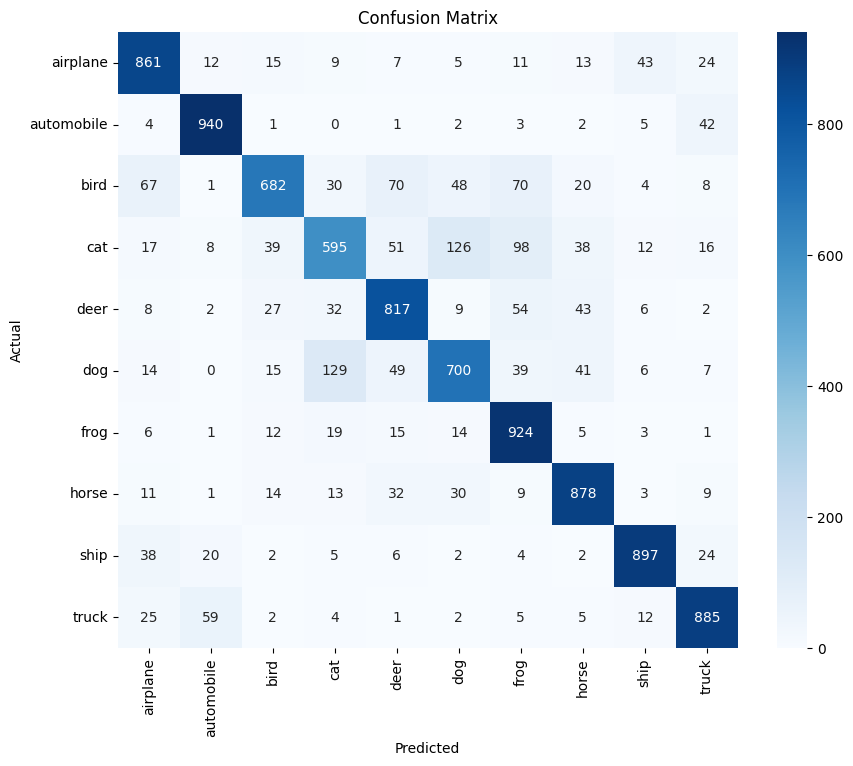

In [55]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()